# Tratamiento de imágenes - Trabajos prácticos
# Práctico 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import cv2 #opencv


# FORMAS DE VER LAS GRAFICAS --------------------
# ELEGIR UNA DE LAS OPCIONES Y DES-COMENTAR (sacar # de la linea)
# ----------------
# a) graficas en línea  entre las celdas (no interactivo)
%matplotlib inline
# ---------------- 
# b) graficas en línea  entre las celdas (interactivo)
# %matplotlib notebook
# ----------------
# c) graficas en ventanas externas (abre una ventana por cada figura)
# %matplotlib
# ----------------
# d) Si se usa "jupyter lab" en lugar de "jupyter notebook" usar %matplotlib widget en lugar de %matplotlib notebook 
# requiere instalar el modulo "ipympl". Ver https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab#56416229
# %matplotlib widget
#---------------------------------------------------

## Visualización

Imágenes sugeridas: cono.png, oclusion.bmp, lena.bmp
 
a) Levantar una imagen monocromática y mostrarla como imagen en niveles de gris y como una superficie.
- Comparar con _Plugins-->3D Viewer_ de Fiji. Fijar opción de **Display as Surface 2D**

La imagen I tiene tamaño:(256, 256, 3)


(-0.5, 255.5, 255.5, -0.5)

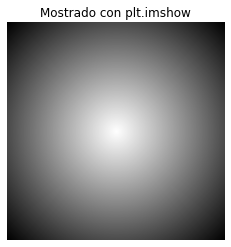

In [2]:
%matplotlib inline
# abrir una imagen y mostrarla
filenames = ['./imagenes/cono.png','./imagenes/kitten.jpg']


# read image
I = cv2.imread(filenames[0])
print("La imagen I tiene tamaño:" + str(I.shape))

# mostrar mediante pyplot
plt.imshow(I)
#plt.gcf().set_size_inches(3, 3) 
plt.title('Mostrado con plt.imshow')
plt.axis('off')


In [3]:
print(I[:,:,0].shape)

(256, 256)


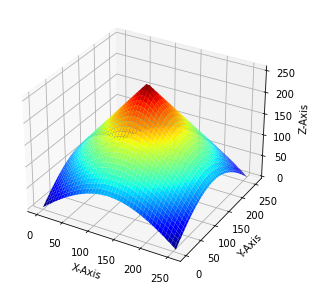

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 3D Projection
def surface_2d(I):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111, projection='3d')
    x=np.arange(0, I.shape[0], 1)
    y=np.arange(0, I.shape[1], 1)
    x_2d, y_2d = np.meshgrid(x,y)
    # Surface Plot

    ax.plot_surface(x_2d, y_2d, I[:,:,0], cmap=cm.jet)

    # Labels

    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Y-Axis')
    ax.set_zlabel('Z-Axis')

    # Display

    plt.show()
surface_2d(I)

b) Dada una fila de la imagen mostrar el perfil de la misma (plot 1D). Idem para una columna.
- Comparar con _Plot Profile_ en Fiji:
    1. Trazar una linea sobre la imagen
    2. _Ctl+K_ o _Analyze --> Plot Profile_

(256, 3)


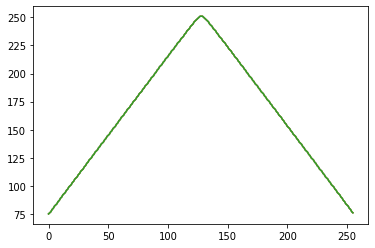

In [5]:
def plot_1d(fila, I):
    x=np.arange(0, I.shape[0], 1)
    print(I[fila].shape)
    plt.plot(x,I[fila] )
    plt.show()
    
plot_1d(125,I)   

c) Mostrar las líneas de nivel de una imagen. Para ello implementar el algoritmo Marching Squares, ver por ejemplo:  
https://en.wikipedia.org/wiki/Marching_squares.   



[[ 10  70]
 [150  90]]


/tmp/ipykernel_5207/1112420365.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
  x=np.abs((nivel-a)/(b-a))
/tmp/ipykernel_5207/1112420365.py:45: RuntimeWarning: overflow encountered in ubyte_scalars
  x=np.abs((nivel-a)/(b-a))
/tmp/ipykernel_5207/1112420365.py:37: RuntimeWarning: overflow encountered in ubyte_scalars
  x=np.abs((nivel-a)/(b-a))
/tmp/ipykernel_5207/1112420365.py:22: RuntimeWarning: overflow encountered in ubyte_scalars
  x=np.abs((nivel-a)/(b-a))


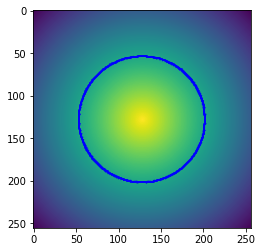

In [6]:
   
def calcular_diferencias(square, nivel):
    diferencias=np.zeros((2,2))
    for i in range (2):
        for j in range (2):
            if square[i,j]>=nivel:
                diferencias[i,j]=square[i,j]-nivel
            else:
                diferencias[i,j]=nivel -square[i,j]
    return diferencias

def imprimir_segmentos(lista):
    fig,ax=plt.subplots()
    for segmento in lista:
        if segmento:
            x1,y1=segmento[0]
            x2,y2=segmento[1]
            ax.plot([x1,x2],[y1,y2],"b-")

def caso_a(square, nivel, col, fila):
    a=square[0,0]
    b=square[1,0]
    x=np.abs((nivel-a)/(b-a))
    punto=[col-0.5,fila+x]
    return(punto)

def caso_b(square, nivel, col, fila):
    a=square[1,0]
    b=square[1,1]
    x=np.abs((nivel-a)/(b-a))
    punto=[col+x,fila+1.5]
    return(punto)

def caso_c(square, nivel, col, fila):
    a=square[0,1]
    b=square[1,1]

    x=np.abs((nivel-a)/(b-a))
    punto=[col+1.5,fila+x]
    return(punto)

def caso_d(square, nivel, col, fila):
    
    a=square[0,0]
    b=square[0,1]
    x=np.abs((nivel-a)/(b-a))
    punto=[col+x,fila-0.5]
    return(punto)
            
def lineasDeNivel(I, niveles):
    
    height, width = np.shape(I)
    for nivel in niveles:
        matriz_umbral=(I>nivel)
        segmento=[]
        for fila in range(0,height-1):
            #print(fila)
            for col in range(0,width-1):
                #print(col)
                segmentito=[]
                segmentito2=[]
                square = I[fila:fila+2, col:col+2]
                #print(square)
                square_umbral=matriz_umbral[fila:fila+2, col:col+2]
                if (square_umbral[0,0] and square_umbral[0,1] and square_umbral[1,0] and square_umbral[1,1]):
                    #print("caso 0")
                    pass
                elif square_umbral[0,0] and square_umbral[0,1] and not square_umbral[1,0] and square_umbral[1,1]:                    
                    #print("caso 1")
                    punto0=caso_a(square, nivel, col, fila)
                    punto1=caso_b(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                    pass
                elif square_umbral[0,0] and square_umbral[0,1] and square_umbral[1,0] and not square_umbral[1,1]:
                    #print("caso 2")
                    punto0=caso_c(square, nivel, col, fila)
                    punto1=caso_b(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                    pass
                elif square_umbral[0,0] and square_umbral[0,1] and not square_umbral[1,0] and not square_umbral[1,1]:
                    #print("caso 3")
                    punto0=caso_a(square, nivel, col, fila)
                    punto1=caso_c(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                    pass
                elif square_umbral[0,0] and not square_umbral[0,1] and square_umbral[1,0] and square_umbral[1,1]:
                    #print("caso 4")
                    punto0=caso_d(square, nivel, col, fila)
                    punto1=caso_c(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                    pass
                elif square_umbral[0,0] and not square_umbral[0,1] and not square_umbral[1,0] and square_umbral[1,1]:
                    #print("caso 5")
                    punto0=caso_c(square, nivel, col, fila)
                    punto1=caso_b(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                    
                    punto2=caso_a(square, nivel, col, fila)
                    punto3=caso_d(square, nivel, col, fila)
                    segmentito2.append(punto2)
                    segmentito2.append(punto3)
                    pass
                elif square_umbral[0,0] and not square_umbral[0,1] and square_umbral[1,0] and not square_umbral[1,1]:
                    #print("caso 6")
                    punto0=caso_d(square, nivel, col, fila)
                    punto1=caso_b(square, nivel, col, fila)

                    segmentito.append(punto0)
                    segmentito.append(punto1)
                    pass
                elif square_umbral[0,0] and not square_umbral[0,1] and not square_umbral[1,0] and not square_umbral[1,1]:
                    #print("caso 7")
                    punto0=caso_d(square, nivel, col, fila)
                    punto1=caso_a(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                elif not square_umbral[0,0] and square_umbral[0,1] and square_umbral[1,0] and square_umbral[1,1]:
                    #print("caso 8")
                    punto0=caso_d(square, nivel, col, fila)
                    punto1=caso_a(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                    pass
                elif not square_umbral[0,0] and square_umbral[0,1] and not square_umbral[1,0] and square_umbral[1,1]:
                    #print("caso 9")
                    punto0=caso_d(square, nivel, col, fila)
                    punto1=caso_b(square, nivel, col, fila)

                    segmentito.append(punto0)
                    segmentito.append(punto1)
                    
                    pass
                elif not square_umbral[0,0] and square_umbral[0,1] and square_umbral[1,0] and not square_umbral[1,1]:
                    #print("caso 10")
                    punto0=caso_c(square, nivel, col, fila)
                    punto1=caso_d(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1) 
                    punto2=caso_a(square, nivel, col, fila)
                    punto3=caso_b(square, nivel, col, fila)
                    segmentito2.append(punto2)
                    segmentito2.append(punto3)
                elif not square_umbral[0,0] and square_umbral[0,1] and  not square_umbral[1,0] and not square_umbral[1,1]:
                    #print("caso 11")
                    punto0=caso_d(square, nivel, col, fila)
                    punto1=caso_c(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                elif not square_umbral[0,0] and  not square_umbral[0,1] and  square_umbral[1,0] and  square_umbral[1,1]:
                    #print("caso 12")
                    punto0=caso_a(square, nivel, col, fila)
                    punto1=caso_c(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                elif not square_umbral[0,0] and  not square_umbral[0,1] and not square_umbral[1,0] and square_umbral[1,1]:
                    #print("caso 13")
                    punto0=caso_c(square, nivel, col, fila)
                    punto1=caso_b(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                elif not square_umbral[0,0] and  not square_umbral[0,1] and  square_umbral[1,0] and not square_umbral[1,1]:
                    #print("caso 14")
                    punto0=caso_a(square, nivel, col, fila)
                    punto1=caso_b(square, nivel, col, fila)
                    segmentito.append(punto0)
                    segmentito.append(punto1)
                elif not square_umbral[0,0] and  not square_umbral[0,1] and not square_umbral[1,0] and not square_umbral[1,1]:
                    #print("caso 15")
                    pass
                if segmentito:
                    segmento.append(segmentito)
                if segmentito2:
                    segmento.append(segmentito2)
                
    #print(segmento)
    imprimir_segmentos(segmento)
    plt.imshow(I)


#caso 1    
pixels = np.array([[10, 70], [150, 90]])
print(pixels)
# Crear una imagen a partir de la matriz de píxeles
#img = cv2.cvtColor(pixels.astype(np.uint8), cv2.COLOR_GRAY2BGR)    
    
I_=I[:,:,0]   
lineasDeNivel(I_, [100,150])


e) Ver qué características tienen las líneas de nivel (curvas abiertas o cerradas, relación con los bordes de la imagen, relación con oclusiones).  
Comparar resultados con la [función contour ](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)

(256, 256)


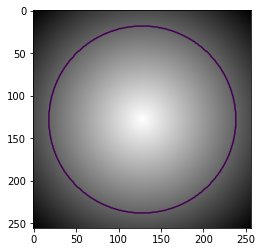

In [7]:
x=np.arange(0, I.shape[0], 1)
y=np.arange(0, I.shape[1], 1)
x_2d, y_2d = np.meshgrid(x,y)
z=I[:,:,0].reshape(I.shape[0], I.shape[1])
print(z.shape)
plt.contour(x_2d, y_2d ,z, [100])
plt.imshow(I)



La imagen I tiene tamaño:(266, 400, 3)
[[100 100 100 ...  52  54  54]
 [101 101 100 ...  55  56  57]
 [101 101 101 ...  60  62  62]
 ...
 [140 140 140 ... 135 135 135]
 [139 139 140 ... 135 133 134]
 [139 139 140 ... 135 133 134]]


/tmp/ipykernel_5207/1112420365.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
  x=np.abs((nivel-a)/(b-a))
/tmp/ipykernel_5207/1112420365.py:45: RuntimeWarning: overflow encountered in ubyte_scalars
  x=np.abs((nivel-a)/(b-a))
/tmp/ipykernel_5207/1112420365.py:37: RuntimeWarning: overflow encountered in ubyte_scalars
  x=np.abs((nivel-a)/(b-a))
/tmp/ipykernel_5207/1112420365.py:22: RuntimeWarning: overflow encountered in ubyte_scalars
  x=np.abs((nivel-a)/(b-a))


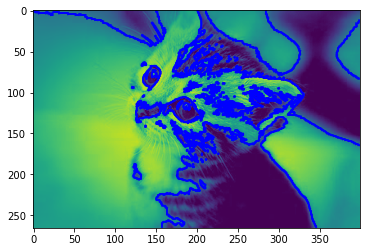

In [8]:
cell=cv2.imread(filenames[1])
print("La imagen I tiene tamaño:" + str(cell.shape))

cell=cell[:,:,0]
print(cell)
lineasDeNivel(cell, [100])


## Histograma

a) Calcular y desplegar el histograma acumulado de una imagen.
- Comparar con el histograma de la misma imagen en Fiji: _Analyze-->Histogram_ o _Ctrl+H_

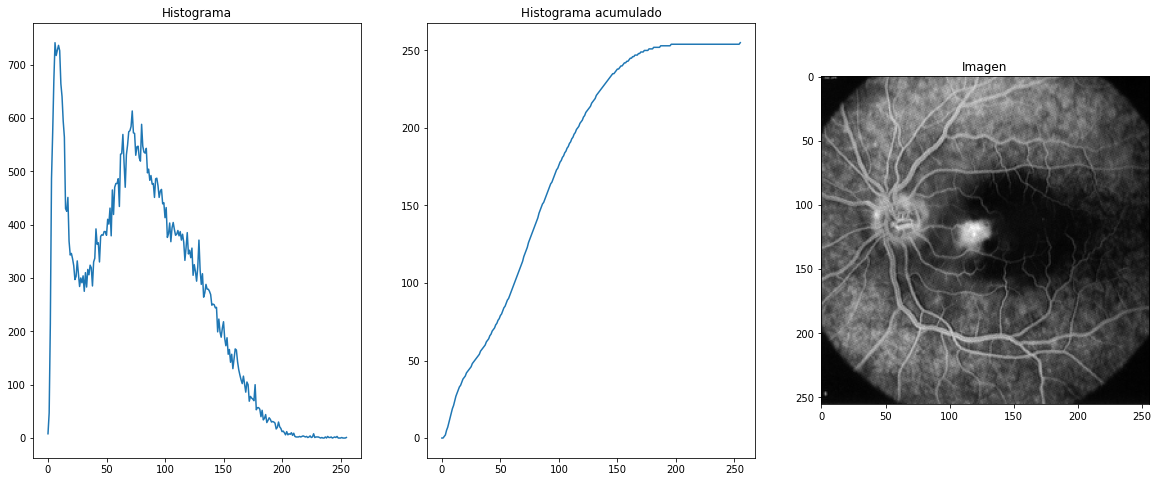

In [40]:
def histrograma(I, nBins):
    histograma_ac = np.zeros(nBins)
    histograma = np.zeros(nBins)

    suma=0
    for i in range(256):
        
        count = np.count_nonzero(I == i)
        suma=suma + count
        histograma_ac[i]=suma
        histograma[i]=count
        
    
    X_min_ac = min(histograma_ac)
    X_max_ac = max(histograma_ac)

    histograma_ac_norm = [np.int((x - X_min_ac) * (255 / (X_max_ac - X_min_ac))) for x in histograma_ac]

    return histograma, histograma_ac_norm

def plotear_histogramas(img):

    x=np.arange(0, 256, 1)
    histograma, histograma_ac=histrograma(img, 256)


    fig, axs = plt.subplots(1,3,figsize=(20,8))


    axs[0].plot(x, histograma)
    axs[1].plot(x, histograma_ac)
    axs[2].imshow(img,cmap="gray")

    axs[0].set_title("Histograma")
    axs[1].set_title("Histograma acumulado")
    axs[2].set_title("Imagen")

    plt.show()
    

filenames = ['./imagenes/kitten.jpg','./imagenes/cono.png','./imagenes/Cell_Colony.tif','./imagenes/parot1.png','./imagenes/retina.pnm','./imagenes/celula.pnm']

I = cv2.imread(filenames[4], 0)
plotear_histogramas(I)

b) Implementar ecualización de histograma. 
- En Fiji ecualizar histograma con _Process -> Enhance Contrast_,  haciendo click en 'Equalize histogram'. Por más información referirse a [este link](https://imagej.nih.gov/ij/docs/menus/process.html#:~:text=Enhance%20Contrast,-Enhances%20image%20contrast&text=Look%20up%20%22enhancement%22%20in%20the,Increasing%20this%20value%20increases%20contrast.)

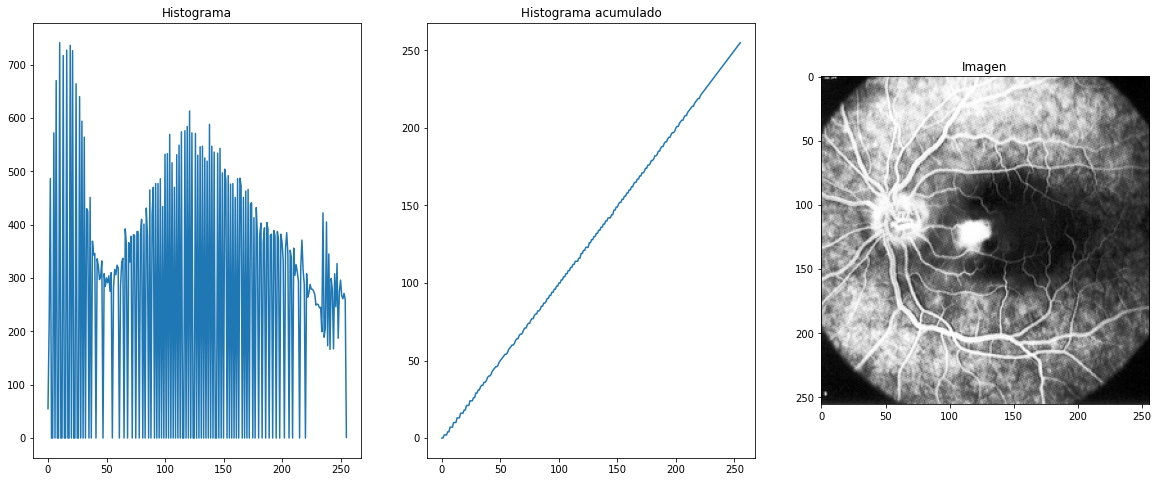

In [41]:
def ecualizarHistograma(I):
    histograma, histograma_ac=histrograma(I, 256)

    I_ecualizada=np.zeros(np.shape(I))


    for i in range(np.shape(I)[0]):
        for j in range(np.shape(I)[1]):
        
            valor=I[i,j]
            #print(valor)
            
            I_ecualizada[i,j]=histograma_ac[valor]
            
    # IMPLEMENTAR
    
    return I_ecualizada

I_ecualizada=ecualizarHistograma(I)

plotear_histogramas(I_ecualizada)


c) Comparar histogramas e histogramas acumulados de la imagen original con los de la ecualizada.    
Imágenes sugeridas: celula.bmp, retina.bmp

- Para ver el histograma acumulado en Fiji, correr el macro _hist_acumulado.ijm_

d) Construir una imagen formada por el conjunto de los pixels de la misma imagen pero ordenados de menor a mayor (según el nivel de gris) formando un degrade de nivel de gris. Mostrar esta imagen. Mostrar su histograma. Compararlo con el histograma de la imagen original. Ecualizar esta imagen y comparar con los resultados obtenidos sobre la imagen original.

e) El matching de histogramas es la transformación de una imagen para que su histograma coincida con un histograma especificado. La ecualización de histograma es un caso particular en el que el histograma especificado tiene distribución uniforme.   
Investigue cómo hacer para ajustar el histograma de una imagen al de otra imagen.  

Aplique el matching de histogramas entre dos imágenes a elección y muestre los resultados.

In [22]:
def find_closest_number_index(numbers_list, target):
    closest_index = None
    min_difference = float('inf')
    for i, number in enumerate(numbers_list):
        difference = abs(number - target)
        if difference < min_difference:
            min_difference = difference
            closest_index = i
    return closest_index

[0, 3, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 19, 20, 20, 20, 20, 21, 21, 22, 23, 23, 24, 24, 25, 25, 25, 26, 26, 27, 28, 28, 29, 29, 30, 31, 31, 32, 32, 32, 33, 33, 34, 35, 35, 36, 37, 37, 37, 38, 38, 39, 40, 40, 40, 41, 42, 42, 43, 44, 45, 45, 46, 47, 47, 48, 49, 50, 51, 52, 52, 53, 54, 54, 55, 55, 57, 57, 58, 58, 59, 60, 60, 61, 62, 62, 63, 64, 65, 66, 67, 67, 68, 69, 70, 71, 71, 72, 73, 74, 74, 75, 76, 77, 77, 78, 79, 80, 81, 82, 83, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 106, 107, 108, 110, 111, 112, 113, 114, 116, 117, 119, 120, 121, 122, 124, 125, 127, 128, 129, 131, 131, 133, 135, 136, 138, 139, 141, 142, 144, 146, 148, 149, 152, 153, 155, 156, 158, 160, 161, 163, 165, 168, 170, 173, 173, 177, 177, 181, 181, 187, 187, 187, 187, 187, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 

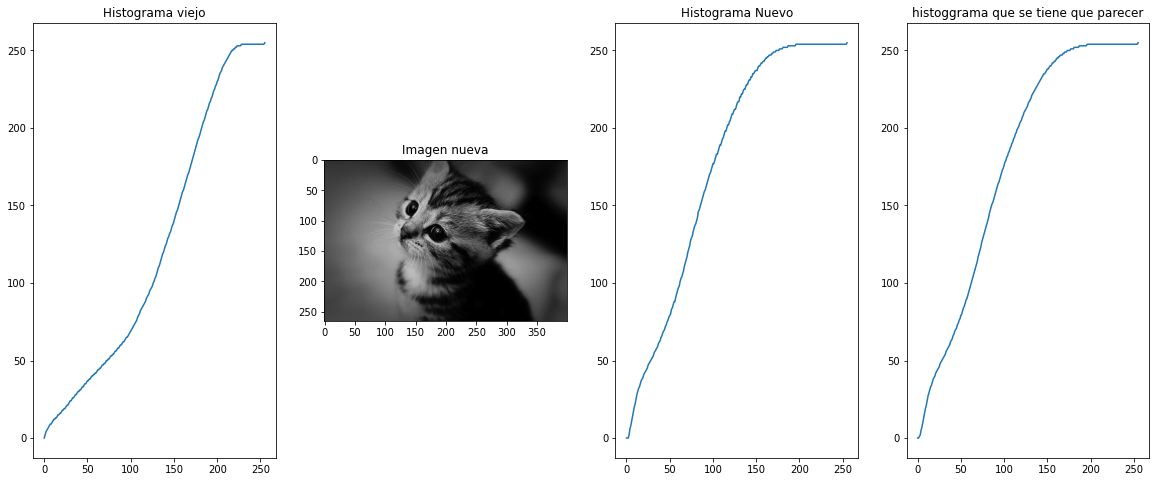

In [68]:
def matching_histograma(I, J):
    """ajusto el histograma de la imagen I al de la imagen J

    Args:
        I (img): la que quiero cambiar
        J (img): la de referencia
    """
    histogramaI, histograma_acI=histrograma(I, 256)
    histogramaJ, histograma_acJ=histrograma(J, 256)


    lut=[]
    for valor in histograma_acI:
        index=find_closest_number_index(histograma_acJ,valor)
        #print(valor)
        #print(index)
        #print("..")
        lut.append(index)
    print(lut)
    I_nueva=np.zeros(np.shape(I))


    for i in range(np.shape(I)[0]):
        for j in range(np.shape(I)[1]):
        
            valor=I[i,j]
            #print(valor)
            
            I_nueva[i,j]=lut[valor]
    histogramanuevo, histograma_acnuevo=histrograma(I_nueva, 256)

    fig, axs = plt.subplots(1,4,figsize=(20,8))


    axs[0].plot(x, histograma_acI)
    axs[1].imshow(I_nueva,cmap="gray")
    axs[2].plot(x, histograma_acnuevo)
    axs[3].plot(x, histograma_acJ)

    #axs[3].imshow(histograma_acJ,cmap="gray")


    axs[0].set_title("Histograma viejo")
    axs[1].set_title("Imagen nueva")
    axs[2].set_title("Histograma Nuevo")
    axs[3].set_title("histoggrama que se tiene que parecer")

    plt.show()
        


I = cv2.imread(filenames[0], 0)

J= cv2.imread(filenames[4], 0)
matching_histograma(I,J)

## Modificación de contraste

a) Implementar una función que realice stretching, es decir, un estiramiento lineal de los valores de gris de modo que el minimo queda en 0 y el máximo en 255

71
255
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   0.   0.   1.   1.   1.   0.   0.   1.   1.   0.   2.   2.
   1.   1.   9.   8.   9.   5.   7.  10.  19.  14.  11.  10.  13.  14.
  21.  17.  21.  15.  20.  25.  22.  31.  36.  37.  42.  51.  52.  54.
  41.  59.  69.  77.  92.  92.  92.  77. 114. 117. 108. 137. 141. 160.
 166. 185. 205. 217. 221. 276. 262. 288. 325. 299. 362. 333. 282. 303.
 318. 291. 301. 275. 264. 243. 282. 260. 282. 268. 292. 294. 324. 336.
 394. 446. 490. 512. 518. 542. 629. 633. 711. 678. 680. 768. 665. 709.
 666. 617. 628. 617. 557. 523. 512. 509. 448. 448. 450. 395. 384. 368.
 339. 322. 288. 268. 274. 243. 210. 196. 159. 156. 140. 122. 128.  90.

array([[189, 185, 181, ..., 183, 166, 149],
       [168, 167, 166, ..., 170, 154, 139],
       [173, 170, 168, ..., 181, 165, 148],
       ...,
       [161, 160, 161, ..., 210, 210, 210],
       [161, 163, 165, ..., 203, 204, 202],
       [163, 167, 161, ..., 206, 206, 206]], dtype=uint8)

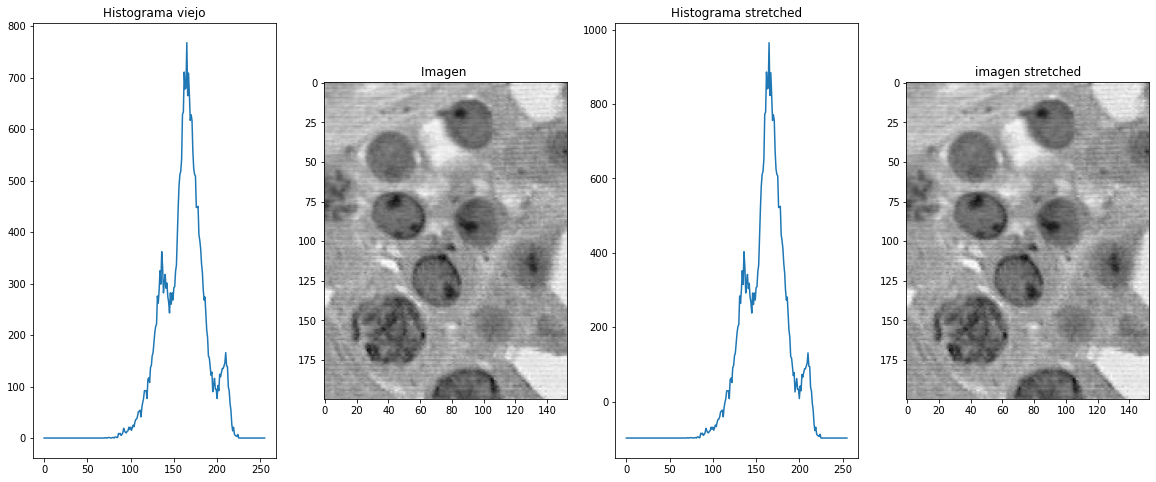

In [96]:
def stretching(I):
    
    histogramaI, histograma_acI=histrograma(I, 256)
    i=0
    encontre=False
    min=0
    while(i<256 and not encontre):

        if histogramaI[i]!=0:
            encontre=True
            min=i
        else:
            i+=1
    i=255
    max=255
    while(i>=0 and not encontre):
        print(i)
        print(histogramaI[i])
        if histogramaI[i]!=0:
            print("entra")
            encontre=True
            max=i
        else:
            i=i-1
    print(min)
    print(max)
      
    histograma_estirado = [np.int((x - min) * (255 / (max - min))) for x in histogramaI]
    print(histogramaI)
    print(histograma_estirado)


   
    fig, axs = plt.subplots(1,4,figsize=(20,8))

    
    axs[0].plot(x, histogramaI)
    axs[1].imshow(I,cmap="gray")
    axs[2].plot(x, histograma_estirado)
    axs[3].imshow(I,cmap="gray")

    #axs[3].imshow(histograma_acJ,cmap="gray")


    axs[0].set_title("Histograma viejo")
    axs[1].set_title("Imagen ")
    axs[2].set_title("Histograma stretched")
    axs[3].set_title("imagen stretched")
    
    return I
I = cv2.imread(filenames[5], 0)

stretching(I)

b) Comparar las imágenes y sus respectivos histogramas antes y después de realizar el estiramiento.

## Procesamiento con FIJI

**Investigar más opciones de cambios de contraste usando Fiji**

+ Image -> Adjust -> Brightness/contrast)
+ Image -> Adjust -> Window/Level)

**Ver además en Fiji**

+ Image -> Lookup Tables ...
+ Analyze -> Surface Plot ...


## Opcional - Plano de bits

1. Mostrar la imagen monocromática _Cell_Colony.tif_ considerando sólo los **4 planos de bit más significativos** de la imagen, descartando los 4 menos significativos.

2. Luego, mostrar la imagen ahora considerando los **4 planos de bit menos significativos** y descartando los otros 4.

¿A qué se debe éste problema?